In [1]:
import pandas as pd

In [2]:
from sklearn.svm import LinearSVC

In [3]:
dataset = pd.read_csv('breast-cancer-wisconsin.csv')

In [4]:
dataset.head()

,sample code number,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1017023,4,1,1,3,2,1,3,1,1,2
2,1018561,2,1,2,1,2,1,3,1,1,2
3,1033078,2,1,1,1,2,1,1,1,5,2
4,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
from sklearn.svm import LinearSVC

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
train_set, test_set = train_test_split(dataset)

In [8]:
print(dataset.columns)

Index(['sample code number', 'clump thickness', 'uniformity of cell size',
       'uniformity of cell shape', 'marginal adhesion',
       'single epithelial cell size', 'bare nuclei', 'bland chromatin',
       'normal nucleoli', 'mitoses', 'status'],
      dtype='object')


In [9]:
print(train_set.shape)

(512, 11)


In [10]:
print(test_set.shape)

(171, 11)


In [11]:
print(dataset.shape)

(683, 11)


In [12]:
features = ['sample code number','clump thickness','uniformity of cell size','uniformity of cell shape',
                   'marginal adhesion','single epithelial cell size', 'bare nuclei', 'bland chromatin',
                   'normal nucleoli', 'mitoses']

In [13]:
target = ['status']

In [14]:
clfsvc = LinearSVC(random_state=0)

In [15]:
print(train_set[target])

     status
223       2
362       2
13        2
426       4
141       2
262       2
563       4
360       2
278       2
392       2
481       4
564       4
419       2
327       2
398       2
81        2
565       4
582       4
484       2
330       2
130       2
127       2
293       2
12        2
652       4
361       2
176       2
192       2
604       4
676       4
..      ...
214       2
31        2
633       4
448       2
407       4
430       4
260       2
591       4
491       4
337       2
490       4
79        2
209       2
40        2
83        2
555       4
673       4
434       4
441       2
344       2
415       2
131       2
228       2
356       2
469       4
601       2
568       4
4         2
267       2
97        2

[512 rows x 1 columns]


In [16]:
clfsvc.fit(train_set[features],train_set.status)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [17]:
test_results_svc = clfsvc.predict(test_set[features])

In [18]:
print(test_results_svc)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(test_results_svc, test_set[target])

0.7192982456140351

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clfknn = KNeighborsClassifier(n_neighbors=11)

In [23]:
clfknn.fit(train_set[features],train_set.status)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [24]:
test_results_knn = clfknn.predict(test_set[features])

In [25]:
print(test_results_knn)

[2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 2 2
 4 4 2 2 2 2 4 2 2 2 2 4 2 4 2 2 4 2 2 4 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 4
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 4 2 4 4 2 4 4 2 2
 2 2 4 2 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 2 4 2 2 2
 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2 2 4]


In [26]:
accuracy_score(test_results_knn, test_set[target])

0.67251461988304095

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clfrfc = RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
clfrfc.fit(train_set[features],train_set.status)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
test_results_rfc = clfrfc.predict(test_set[features])

In [31]:
print(test_results_rfc)

[2 2 2 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 4 4 2 2 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 2 4 4 4 2 4 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2 2 2 4 2 4
 2 2 2 2 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 4 2 2 4 2 2 2 2 2 2
 4 2 2 2 4 2 2 4 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 2 4 2 2 2 2 2 4
 2 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4]


In [32]:
accuracy_score(test_results_rfc, test_set[target])

0.95906432748538006

In [33]:
from sklearn import metrics



In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
fpr = dict()

In [36]:
tpr = dict()

In [37]:
roc_auc = dict()

In [59]:
y_test = test_set[target]

In [117]:
y_score_rfc = test_results_rfc
y_score_knn = test_results_knn
y_score_svc = test_results_svc

In [106]:
from sklearn.model_selection import cross_val_score

In [119]:
score_rfc = cross_val_score(clfrfc,dataset[features],dataset.status,cv=10)
score_knn = cross_val_score(clfknn,dataset[features],dataset.status,cv=10)
score_svc = cross_val_score(clfsvc,dataset[features],dataset.status,cv=10)

In [124]:
print('RFC',score_rfc)
print('KNN',score_knn)
print('SVC',score_svc)

RFC [ 0.65217391  0.88405797  0.92753623  0.95652174  1.          1.          1.
  0.98529412  0.98529412  0.46268657]
KNN [ 0.53623188  0.42028986  0.55072464  0.44927536  0.60294118  0.45588235
  0.64705882  0.64705882  0.44117647  0.58208955]
SVC [ 0.34782609  0.34782609  0.34782609  0.34782609  0.64705882  0.35294118
  0.35294118  0.35294118  0.64705882  0.34328358]


In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import binarize

In [137]:
y_test_bin = binarize(y_test,3)


In [138]:
print(y_score_rfc)

[2 2 2 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 4 4 2 2 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 2 4 4 4 2 4 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2 2 2 4 2 4
 2 2 2 2 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 4 2 2 4 2 2 2 2 2 2
 4 2 2 2 4 2 2 4 2 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 2 4 2 2 2 2 2 4
 2 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4]


In [139]:
y_score_temp_rfc = y_score_rfc.reshape(-1, 1)
y_score_temp_knn = y_score_knn.reshape(-1, 1)
y_score_temp_svc = y_score_svc.reshape(-1, 1)

In [157]:
y_score_bin_rfc = binarize (y_score_temp_rfc,3)
y_score_bin_knn = binarize (y_score_temp_knn,3)
y_score_bin_svc = binarize (y_score_temp_svc,3)

In [167]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test_bin, y_score_bin_rfc)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_bin, y_score_bin_knn)
fpr_svc, tpr_svc, thresholds = roc_curve(y_test_bin, y_score_bin_svc)

In [168]:
roc_auc_rfc = auc(y_test_bin, y_score_bin_rfc,True)
roc_auc_knn = auc(y_test_bin, y_score_bin_knn,True)
roc_auc_svc = auc(y_test_bin, y_score_bin_svc,True)

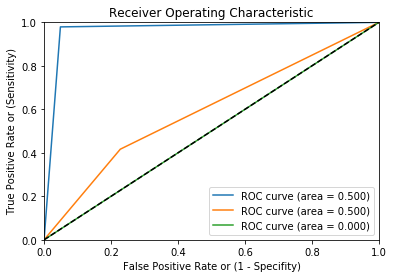

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr_rfc, tpr_rfc, label='ROC curve (area = %0.3f)' % roc_auc_rfc)
plt.plot(fpr_knn, tpr_knn, label='ROC curve (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_svc, tpr_svc, label='ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

